<a id='toc'></a>

<div class="alert alert-block alert-info">
<center> <h1> Enterprise Data Science Bootcamp </h1> </center> <br>
<center> <h2> Inventory Management- Back Orders </h2> </center>
<center> <h3>   2021/2022 </h3> </center>

**GROUP E:** <br>
- Nuno Bolas          `20211052` <br>
- João Magalhães      `20211044` <br>
- Mariana Teixeira    `20211058` <br>
- Maria Trindade      `20211049` <br>

https://medium.com/analytics-vidhya/predicting-material-backorders-in-inventory-management-90e4d0ece6ba



## Table of Contents

* [Import](#chapter0)
* [Data Understanding](#chapter1)
* [Data preparation](#chapter2)
* [Feature Engineering](#chapter3)
* [Feature Selection](#chapter4)
* [Train Test Split](#chapter7)
* [Balancing the dataset](#chapter8)
* [Modelling](#chapter5)
    * [K-Folds and Repeated K-Folds](#chapter5.1)
    * [Logistic Regression](#chapter5.2)
    * [Neural Networks](#chapter5.3)
    * [Random Forest](#chapter5.4)
    * [Gradient Boosted Decision Tree](#chapter5.5)
    * [Adaboost](#chapter5.6)
    * [Extra Trees](#chapter5.7)
    * [Model Comparison](#chapter5.8)
* [Prediction](#chapter6)

[Back to the start](#toc)

## Import <a class="anchor" id="chapter0"></a>

In [1]:
#Data Understanding
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from pandas_profiling import ProfileReport
#from sklearn.impute import KNNImputer

#Feature Engineering/Selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import ks_2samp
from scipy import stats

# Modelling 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Set the style for the Seaborn's plots
sns.set_style('whitegrid',{
    'xtick.bottom': False,
    'xtick.color': '.1',
    'xtick.direction': 'out',
    'xtick.top': False,
    'xtick.major.size': 1,
    'xtick.minor.size': 0.5,
    'ytick.left': True,
    'ytick.color': '.1',
    'ytick.direction': 'out',
    'ytick.right': False,
    'ytick.major.size': 1,
    'ytick.minor.size': 0.5,    
    'ytick.color': '.1',
    'grid.linestyle': '--',
    'axes.edgecolor': '.1',
    'grid.color': '0.8'
 })

palette = sns.color_palette("Set2") 
sns.set_palette(palette)

[Back to the start](#toc)

## Data Understanding <a class="anchor" id="chapter1"></a>

In [3]:
test = pd.read_csv("data/Test_Dataset_v2.csv")
train = pd.read_csv("data/Training_Dataset_v2.csv")

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
train['perf_6_month_avg'].mean()

-6.872058837773267

In [5]:
train['perf_12_month_avg'].mean()

-6.4379467431763455

In [6]:
test.head(5)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


### Initial Analysis

In [7]:
#train = train.set_index("sku")
#test = test.set_index("sku")

In [8]:
# descriptive statistics for the variables
train.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [9]:
train.describe(include=['O'])

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687861,1687860,1687860,1687860,1687860,1687860,1687860,1687860
unique,1687861,2,2,2,2,2,2,2
top,1026827,No,No,No,No,Yes,No,No
freq,1,1686953,1300377,1687615,1484026,1626774,1687129,1676567


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [11]:
# Duplicated records
print('Train: \n',train.duplicated().value_counts(),'\n') 

Train: 
 False    1687861
dtype: int64 



In [12]:
# Missing Values on train dataset
train.isna().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

lead_time - Transit time for product (if available)

    Sku is the identifier and therefore, the index; 

    Out of the other 21 features (excluding the class label went_on_backorder), 15 of them are numerical and 6 of them are categorical. 
    All the categorical features (potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy and rev_stop) have either Yes or No, so we will transform them to binary; 

    The numerical features include national_inv, lead_time, in_transit_qty, forecast_3_month, forecast_6_month, forecast_9_month, sales_1_month, sales_3_month, sales_6_month, sales_9_month, min_bank, pieces_past_due, perf_6_month_avg, perf_12_month_avg, local_bo_qty. 

    lead_time is the only feature with missing values.In addition, the last row of every feature has null values so will removed. 

### Pandas profiling

In [13]:
#pip install pandas-profiling

In [14]:
#profile = ProfileReport(train)
#profile  

In [15]:
#profile.to_file("report.html")

* The target variable went_on_backorder is a categorical feature with two values "Yes" and "No".
* 99.33% belong to the class "Yes" and remaining 0.669% belong to the class "No"; dataset is highly imbalanced with majority and minority class ratio of approximately 148:1
* in_transit_qty has 1344662 (79.7%) zeros

Real numbers: 
* forecasts: ~65% is 0; very correlated within themselves and with sales; highly skewed; with outliers;
* in transit: skewed; with ~80% of 0s; small IQR; many outliers; 
* lead_time: has 6% of missing values; 
* local_bo_qty: skewed; 98.9% of 0 values; 
* min_bank: 52% 0s; 
* performance features 6,12 months: high correlation with themselves, ~7-8% of -99
* pieces_past_due: skewed, 98.5% 0s; 
* sales: skewed; lots of 0s ~40%; high correlation with each others; 

Booleans: 
* oe_constraint: 99% no (high relation with backorder); 
* potential_issue: 99.9% No(high relation with backorder);
* ppap_risk: -
* rev_stop: 99.9% no (no relation with backorder). 

[Back to the start](#toc)

## Data Preparation <a class="anchor" id="chapter2"></a>

### Missing values

In [16]:
total = np.round(train['lead_time'].isna().sum()/ len(train), 4)
print('Total percentage of Missing Values: ', total*100, '%')

Total percentage of Missing Values:  5.9799999999999995 %


In [17]:
train.drop(train[train['national_inv'].isna()].index,inplace = True) 
#This line was NA in all values but sku, so it was deleted

In [18]:
train_numerical = train.select_dtypes(include='number')

In [19]:
#imputer = KNNImputer(n_neighbors=2, weights="uniform").fit(train_numerical)
#imputed_matrix = imputer.transform(train_numerical)

In [20]:
#data_cleaned = pd.DataFrame(data=imputed_matrix, columns=train_numerical.columns, index=train_numerical.index)

In [21]:
#train[data_cleaned.columns] = data_cleaned

In [22]:
#train.isna().sum()

In [23]:
#IMPUTING WITH KNN TAKES WAY TOO MUCH TIME (1H+)? Don't know why

In [24]:
train_numerical.mean()

national_inv         496.111782
lead_time              7.872267
in_transit_qty        44.052022
forecast_3_month     178.119284
forecast_6_month     344.986664
forecast_9_month     506.364431
sales_1_month         55.926069
sales_3_month        175.025930
sales_6_month        341.728839
sales_9_month        525.269701
min_bank              52.772303
pieces_past_due        2.043724
perf_6_month_avg      -6.872059
perf_12_month_avg     -6.437947
local_bo_qty           0.626451
dtype: float64

In [25]:
train_numerical = train_numerical.fillna(train_numerical.mean())

In [26]:
train_numerical

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0
2,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
3,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0
4,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,-99.00,-99.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,2.000000,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0.0,0.69,0.69,5.0
1687856,-1.0,7.872267,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,0.0,-99.00,-99.00,1.0
1687857,-1.0,9.000000,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0.0,0.86,0.84,1.0
1687858,62.0,9.000000,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0.0,0.86,0.84,6.0


In [27]:
train[train_numerical.columns] = train_numerical

In [28]:
train.isna().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

### Duplicates

In [29]:
#train.duplicated().sum() 0 duplicates without index as sku

In [30]:
#train.duplicated().sum()/train.shape[0] 

There are no duplicates in this dataset

In [31]:
train = train.set_index("sku")

In [32]:
train.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,
1026827,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1043384,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
1043696,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1043852,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
1044048,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


### Outliers

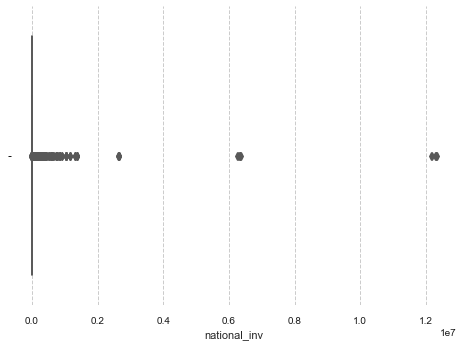

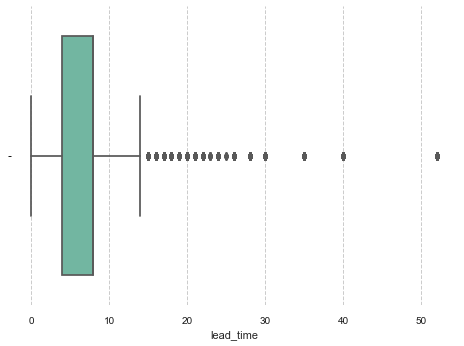

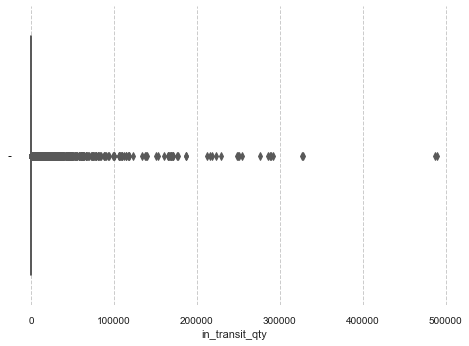

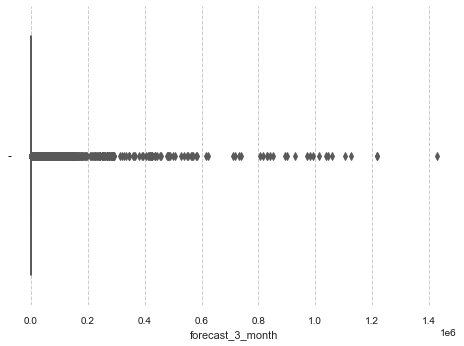

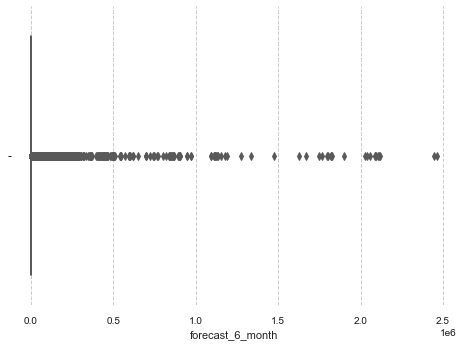

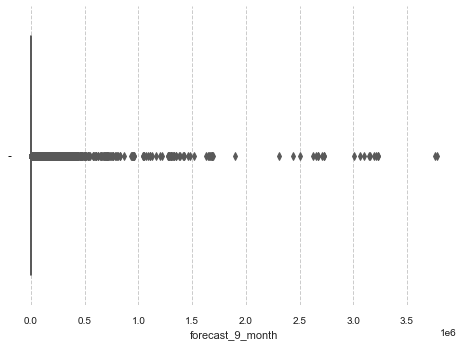

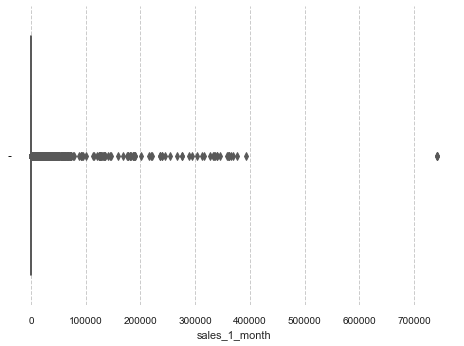

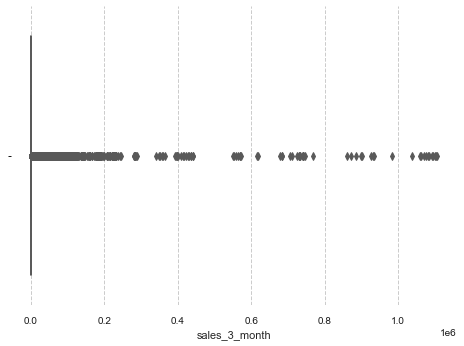

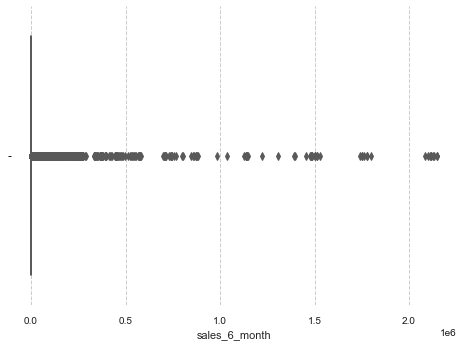

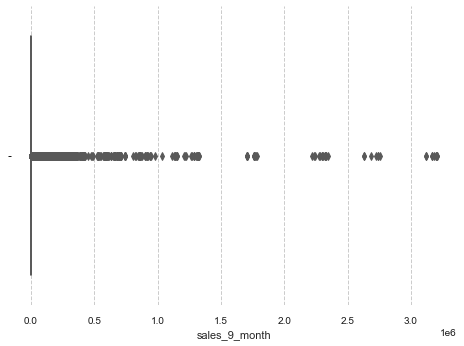

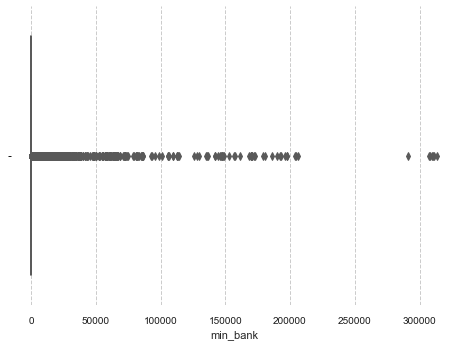

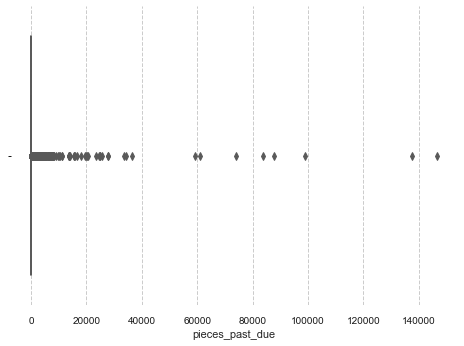

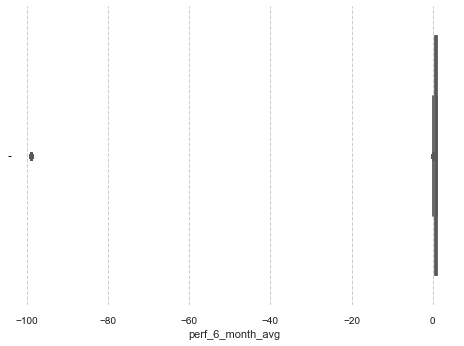

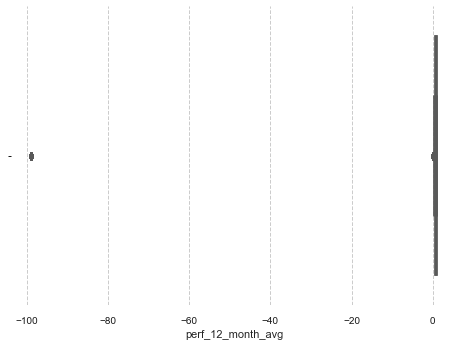

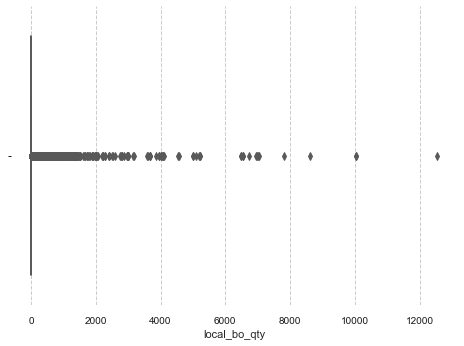

In [33]:
for i in train_numerical:
    sns.boxplot(data=train_numerical, x=i)
    plt.show()

In [34]:
outlier_metric_features = train_numerical.columns

#### Outliers

In [35]:
q25 = train.quantile(.25)
q75 = train.quantile(.75)
iqr = (q75 - q25)



upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr



filters2 = []
for metric in outlier_metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(train[metric].between(llim, ulim, inclusive=True))


filters2 = pd.Series(np.all(filters2, 0), index=train.index)
df_2 = train[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / train.shape[0], 4))

/var/folders/89/gv90tkm505qglgm9s_mrxwxw0000gn/T/ipykernel_92857/3564339984.py:16: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(train[metric].between(llim, ulim, inclusive=True))


Percentage of data kept after removing outliers: 0.5255


#### Z-score

In [36]:
total = 0
for i in outlier_metric_features: 
    z = np.abs(stats.zscore(train[i])) 
    z[z > 3].count()
    print('Percentage of outliers for',str(i),' : ', (np.round((z[z > 3].count())/ len(train), 4)*100))
    total += (np.round((z[z > 3].count())/ len(train), 4))

print('Total percentage of Outliers: ', total*100, '%')

Percentage of outliers for national_inv  :  0.04
Percentage of outliers for lead_time  :  1.81
Percentage of outliers for in_transit_qty  :  0.13999999999999999
Percentage of outliers for forecast_3_month  :  0.15
Percentage of outliers for forecast_6_month  :  0.15
Percentage of outliers for forecast_9_month  :  0.13999999999999999
Percentage of outliers for sales_1_month  :  0.1
Percentage of outliers for sales_3_month  :  0.12
Percentage of outliers for sales_6_month  :  0.13
Percentage of outliers for sales_9_month  :  0.12
Percentage of outliers for min_bank  :  0.15
Percentage of outliers for pieces_past_due  :  0.04
Percentage of outliers for perf_6_month_avg  :  7.670000000000001
Percentage of outliers for perf_12_month_avg  :  7.23
Percentage of outliers for local_bo_qty  :  0.1
Total percentage of Outliers:  18.09 %


In [37]:
train = train[(z < 3)]

In [38]:
train.shape

(1686252, 22)

### Transform Variables

**Dummies**

In [39]:
train = pd.get_dummies(train, drop_first = True)

In [40]:
train.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue_Yes', 'deck_risk_Yes',
       'oe_constraint_Yes', 'ppap_risk_Yes', 'stop_auto_buy_Yes',
       'rev_stop_Yes', 'went_on_backorder_Yes'],
      dtype='object')

In [41]:
train.rename(columns = {'went_on_backorder_Yes':'went_on_backorder'},inplace = True)

train = train.reindex(columns= ['went_on_backorder','national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue_Yes', 'deck_risk_Yes',
       'oe_constraint_Yes', 'ppap_risk_Yes', 'stop_auto_buy_Yes',
       'rev_stop_Yes'])

In [42]:
#train.rename(columns = {'potential_issue_Yes':'potential_issue', 'deck_risk_Yes':'deck_risk','oe_constraint_Yes':'oe_constraint',
#                       'ppap_risk_Yes':'ppap_risk','stop_auto_buy_Yes':'stop_auto_buy','rev_stop_Yes': 'rev_stop',
#                       'went_on_backorder_Yes': 'went_on_backorder'}, inplace = True)

#train = train.reindex(columns=['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
#       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
#       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
#       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
#       'local_bo_qty', 'potential_issue', 'deck_risk',
#       'oe_constraint', 'ppap_risk', 'stop_auto_buy',
#       'rev_stop', 'went_on_backorder'])
#train.head()

**Datatypes**

In [43]:
#train = train.astype('float16')
#train.head(5)

In [44]:
train

,went_on_backorder,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
sku,,,,,,,,,,,,,,,,,,,,,
1026827,0,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,0,1,0
1043384,0,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,0,1,0
1043696,0,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,1,0,0,1,0
1043852,0,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,0,1,0
1044048,0,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407754,0,0.0,2.000000,0.0,10.0,10.0,10.0,0.0,5.0,7.0,...,0.0,0.69,0.69,5.0,0,1,0,0,1,0
1373987,0,-1.0,7.872267,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,0,0,0,0,1,0
1524346,1,-1.0,9.000000,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,0,1,0,0,0,0


### Standardize the dataset

In [45]:
feats = ['national_inv', 'lead_time','perf_6_month_avg', 'perf_12_month_avg']

In [46]:
scaler = StandardScaler().fit(train[feats])

In [47]:
train[feats] = scaler.transform(train[feats])

In [48]:
train.head(5)

,went_on_backorder,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
sku,,,,,,,,,,,,,,,,,,,,,
1026827,0,-0.017284,-0.000059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-3.468854,-3.581167,0.0,0,0,0,0,1,0
1043384,0,-0.017213,0.164723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.296075,0.287459,0.0,0,0,0,0,1,0
1043696,0,-0.017213,-0.000059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-3.468854,-3.581167,0.0,0,1,0,0,1,0
1043852,0,-0.017035,0.018605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.262564,0.254186,0.0,0,0,0,0,1,0
1044048,0,-0.016999,-0.000059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-3.468854,-3.581167,0.0,0,1,0,0,1,0


[Back to the start](#toc)

## Feature Engineering <a class="anchor" id="chapter3"></a>

### Correlations

**Pearson**

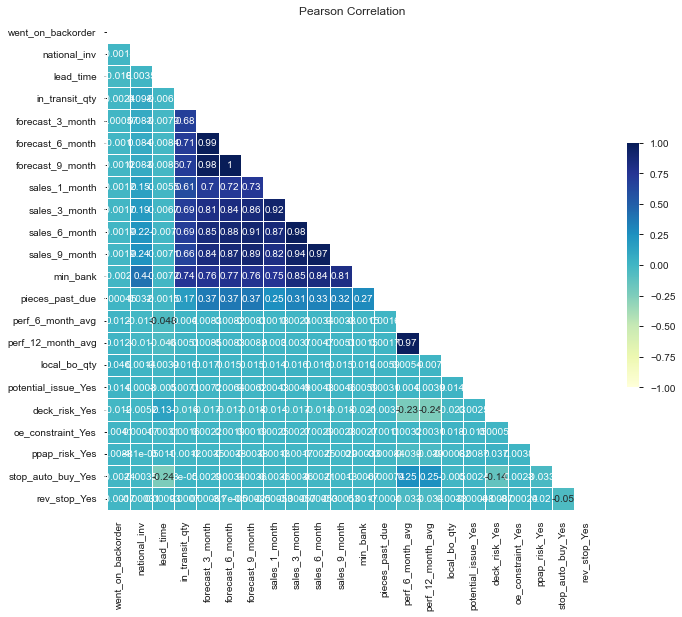

In [49]:
# Compute the correlation matrix - Pearson
corr = train.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask,cmap = 'YlGnBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})
pyplot.title('Pearson Correlation')
pyplot.show()

**Spearman**

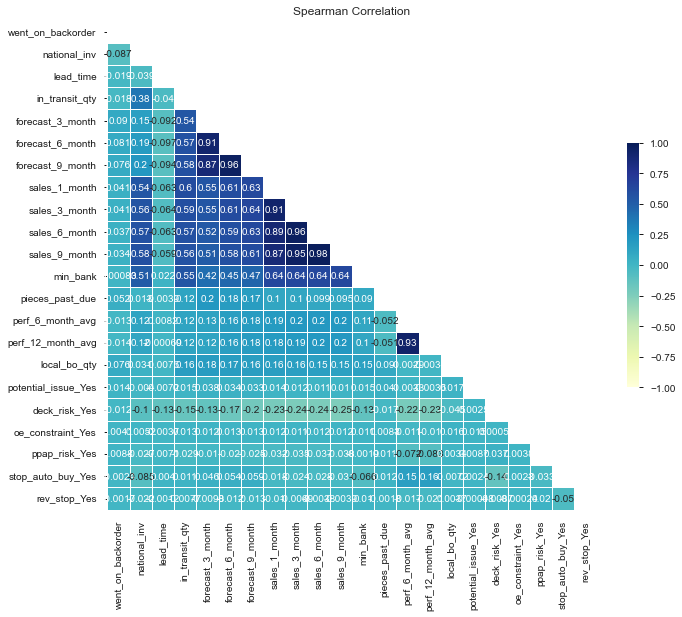

In [50]:
# Compute the correlation matrix - Spearman
corr = train.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask,cmap = 'YlGnBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})
pyplot.title('Spearman Correlation')
pyplot.show()

In [51]:
corr_pairs = corr.unstack().sort_values(kind="quicksort")
abs(corr_pairs)[abs(corr_pairs).between(.65,.9999)]

forecast_3_month   forecast_9_month     0.869276
forecast_9_month   forecast_3_month     0.869276
sales_9_month      sales_1_month        0.872436
sales_1_month      sales_9_month        0.872436
                   sales_6_month        0.885035
sales_6_month      sales_1_month        0.885035
forecast_3_month   forecast_6_month     0.909828
forecast_6_month   forecast_3_month     0.909828
sales_1_month      sales_3_month        0.914904
sales_3_month      sales_1_month        0.914904
perf_6_month_avg   perf_12_month_avg    0.928710
perf_12_month_avg  perf_6_month_avg     0.928710
sales_3_month      sales_9_month        0.947129
sales_9_month      sales_3_month        0.947129
forecast_9_month   forecast_6_month     0.957998
forecast_6_month   forecast_9_month     0.957998
sales_6_month      sales_3_month        0.962966
sales_3_month      sales_6_month        0.962966
sales_6_month      sales_9_month        0.982570
sales_9_month      sales_6_month        0.982570
dtype: float64

In_transit_qty, forecast_3_month, forecast_6_month, forecast_9_month, sales_1_month, sales_3_month, sales_6_month, sales_9_month and min_bank are highly correlated with each other. Among them, forecast_3_month, forecast_6_month and forecast_9_month are more correlated with each other compared to the rest. Similarly, sales_1_month, sales_3_month, sales_6_month and sales_9_month are more correlated with each other than any other feature. We also see that perf_6_month_avg and perf_12_month_avg are highly correlated with each other.

**Kolmogorov–Smirnov test for numerical features**

In [52]:
numerical_feats = ['national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty']

In [53]:
#ks_2samp(pd.DataFrame(train['went_on_backorder']),train[numerical_feats]) #not working, try to figure the issue

**Stochastic/Probability Matrix for categorical features**

In [54]:
train.columns

Index(['went_on_backorder', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue_Yes', 'deck_risk_Yes',
       'oe_constraint_Yes', 'ppap_risk_Yes', 'stop_auto_buy_Yes',
       'rev_stop_Yes'],
      dtype='object')

In [55]:
categorical_feats = ['potential_issue_Yes', 'deck_risk_Yes',
       'oe_constraint_Yes', 'ppap_risk_Yes', 'stop_auto_buy_Yes',
       'rev_stop_Yes']

In [56]:
for i in categorical_feats: 
    cat_vs_went_on_backorder = train.loc[:, [i, 'went_on_backorder']]
    x = np.array(cat_vs_went_on_backorder)

    cat_matrix = np.array([[x[np.where((x[:,0] == 0) * (x[:,1] == 0))].shape[0] / len(x), 
                                                    x[np.where((x[:,0] == 0) * (x[:,1] == 1))].shape[0] / len(x)],
                                                   [x[np.where((x[:,0] == 1) * (x[:,1] == 0))].shape[0] / len(x), 
                                                    x[np.where((x[:,0] == 1) * (x[:,1] == 1))].shape[0] / len(x)]])

    cat_matrix_df = pd.DataFrame(cat_matrix, columns=['No', 'Yes'], index=['No', 'Yes'])
    print(cat_matrix_df)

           No       Yes
No   0.992850  0.006619
Yes  0.000501  0.000029
           No       Yes
No   0.764758  0.005519
Yes  0.228593  0.001130
           No       Yes
No   0.993220  0.006644
Yes  0.000131  0.000005
           No       Yes
No   0.873587  0.005613
Yes  0.119765  0.001035
           No       Yes
No   0.035883  0.000277
Yes  0.957469  0.006372
           No       Yes
No   0.992918  0.006648
Yes  0.000434  0.000000


### PCA

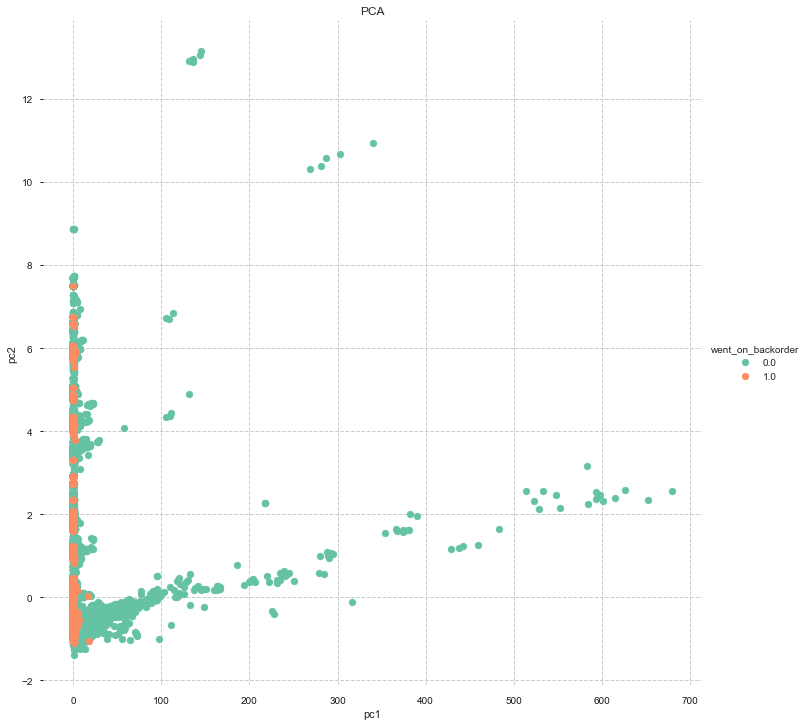

In [57]:
x_train = train.drop('went_on_backorder', axis=1)
y_train = train['went_on_backorder']

standard_scalar = StandardScaler()
std_x_train = standard_scalar.fit_transform(x_train)

model = PCA(n_components=2, random_state=42)
pca_data = model.fit_transform(std_x_train)
pca_data = np.vstack((pca_data.T, y_train)).T
pca_df = pd.DataFrame(data=pca_data, columns=("pc1", "pc2", "went_on_backorder"))

sns.FacetGrid(pca_df, hue='went_on_backorder', height=10).map(plt.scatter, 'pc1', 'pc2').add_legend()
plt.title("PCA")
plt.show()

[Back to the start](#toc)

## Feature Selection <a class="anchor" id="chapter4"></a>

[Back to the start](#toc)

## Train Test Split <a class="anchor" id="chapter7"></a>

In [58]:
X = train.drop('went_on_backorder', axis=1)
y = train['went_on_backorder']

In [59]:
# TRAIN (70%) & VALIDATION (30%) SPLIT
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [60]:
y_train.value_counts()

0    1172528
1       7848
Name: went_on_backorder, dtype: int64

[Back to the start](#toc)

## Balancing the dataset <a class="anchor" id="chapter8"></a>

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/ 
https://heartbeat.comet.ml/resampling-to-properly-handle-imbalanced-datasets-in-machine-learning-64d82c16ceaa

### Undersampling

In [61]:
#pip install imblearn

In [62]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [63]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [64]:
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [65]:
print(Counter(y_under))

Counter({0: 7848, 1: 7848})


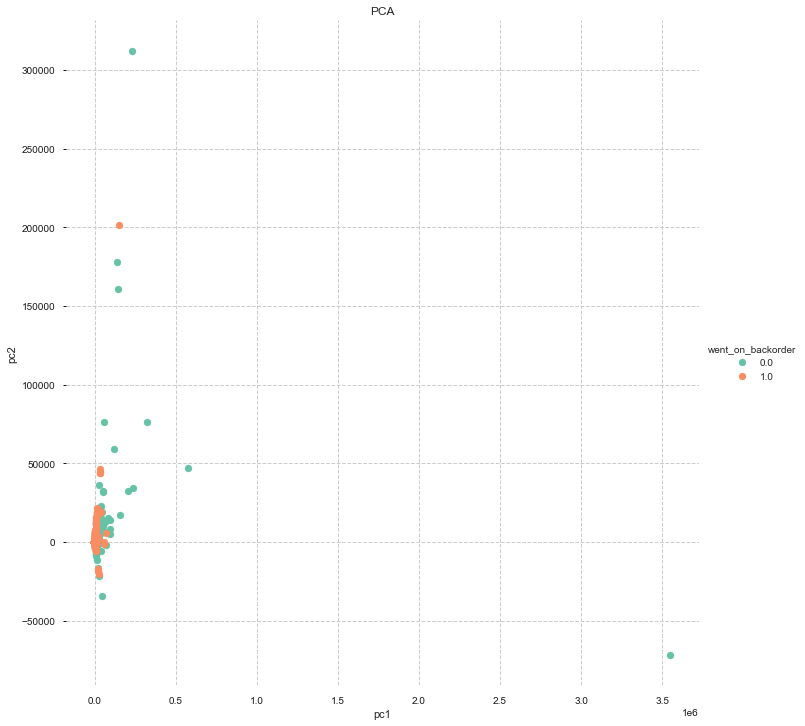

In [66]:
model = PCA(n_components=2, random_state=42)
pca_data = model.fit_transform(X_under)
pca_data = np.vstack((pca_data.T, y_under)).T
pca_df = pd.DataFrame(data=pca_data, columns=("pc1", "pc2", "went_on_backorder"))

sns.FacetGrid(pca_df, hue='went_on_backorder', height=10).map(plt.scatter, 'pc1', 'pc2').add_legend()
plt.title("PCA")
plt.show()

### Oversampling

In [67]:
from imblearn.over_sampling import RandomOverSampler

In [68]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [69]:
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [70]:
print(Counter(y_over))

Counter({0: 1172528, 1: 1172528})


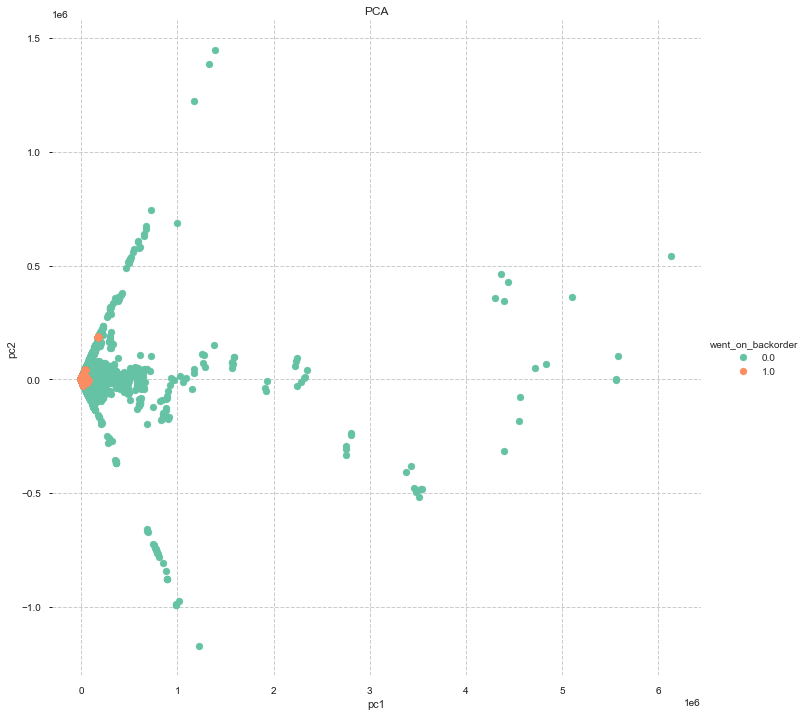

In [71]:
model = PCA(n_components=2, random_state=42)
pca_data = model.fit_transform(X_over)
pca_data = np.vstack((pca_data.T, y_over)).T
pca_df = pd.DataFrame(data=pca_data, columns=("pc1", "pc2", "went_on_backorder"))

sns.FacetGrid(pca_df, hue='went_on_backorder', height=10).map(plt.scatter, 'pc1', 'pc2').add_legend()
plt.title("PCA")
plt.show()

### SMOTE

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
oversample = SMOTE(sampling_strategy='minority')

In [74]:
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [75]:
counter = Counter(y_smote)
print(counter)

Counter({0: 1172528, 1: 1172528})


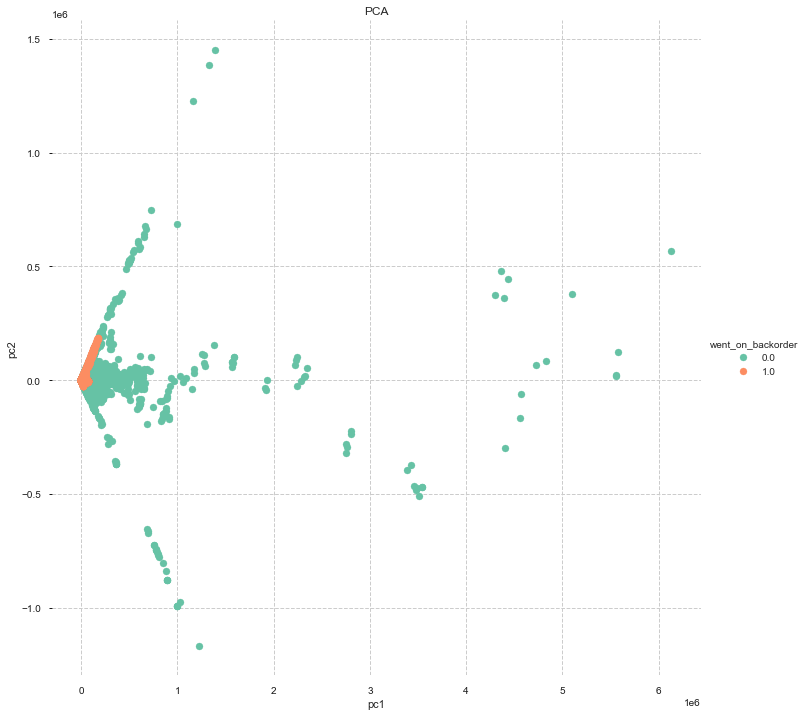

In [76]:
model = PCA(n_components=2, random_state=42)
pca_data = model.fit_transform(X_smote)
pca_data = np.vstack((pca_data.T, y_smote)).T
pca_df = pd.DataFrame(data=pca_data, columns=("pc1", "pc2", "went_on_backorder"))

sns.FacetGrid(pca_df, hue='went_on_backorder', height=10).map(plt.scatter, 'pc1', 'pc2').add_legend()
plt.title("PCA")
plt.show()

### SMOTE with undersampling

In [77]:
from imblearn.pipeline import Pipeline

In [78]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [79]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [80]:
X_comb, y_comb = pipeline.fit_resample(X_train, y_train)

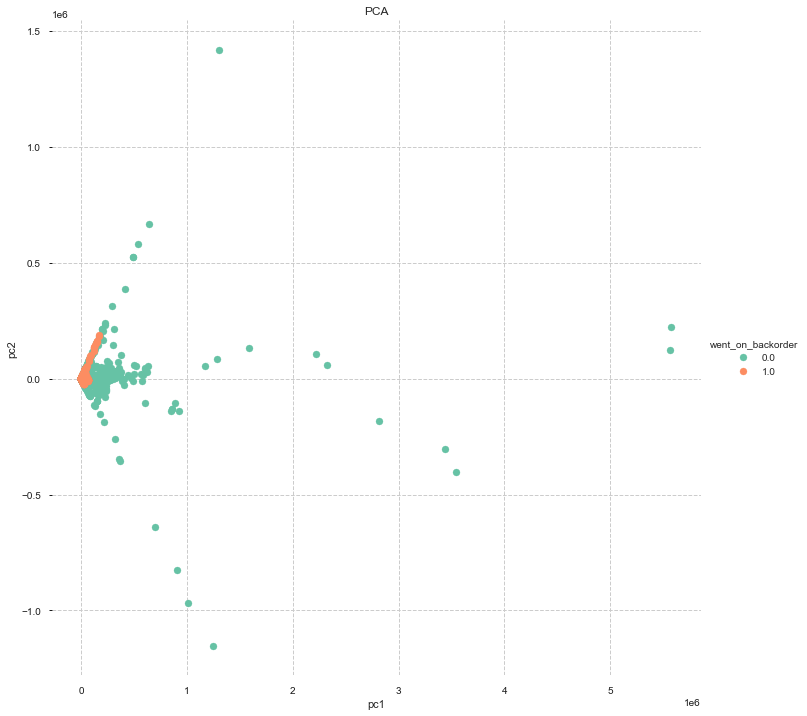

In [81]:
model = PCA(n_components=2, random_state=42)
pca_data = model.fit_transform(X_comb)
pca_data = np.vstack((pca_data.T, y_comb)).T
pca_df = pd.DataFrame(data=pca_data, columns=("pc1", "pc2", "went_on_backorder"))

sns.FacetGrid(pca_df, hue='went_on_backorder', height=10).map(plt.scatter, 'pc1', 'pc2').add_legend()
plt.title("PCA")
plt.show()

### ADASYN

In [82]:
from imblearn.over_sampling import ADASYN

# create the object to resample the majority class.
adasyn = ADASYN(sampling_strategy="minority")

# fit the object to the training data.
x_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

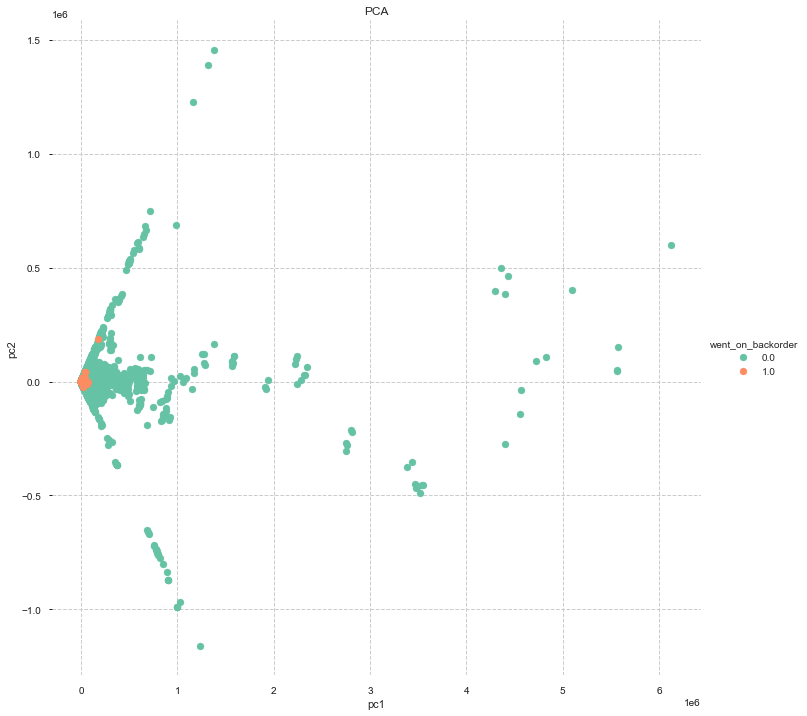

In [83]:
model = PCA(n_components=2, random_state=42)
pca_data = model.fit_transform(X_train)
pca_data = np.vstack((pca_data.T, y_train)).T
pca_df = pd.DataFrame(data=pca_data, columns=("pc1", "pc2", "went_on_backorder"))

sns.FacetGrid(pca_df, hue='went_on_backorder', height=10).map(plt.scatter, 'pc1', 'pc2').add_legend()
plt.title("PCA")
plt.show()

[Back to the start](#toc)

## Modelling <a class="anchor" id="chapter5"></a>

### K-Folds and Repeated K-folds  <a class="anchor" id="chapter5.1"></a>

In [84]:
kf = KFold(n_splits=10)
rkf = RepeatedKFold(n_splits=10, n_repeats=2) 

In [85]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 168626  168627  168628 ... 1686249 1686250 1686251] TEST: [     0      1      2 ... 168623 168624 168625]
TRAIN: [      0       1       2 ... 1686249 1686250 1686251] TEST: [168626 168627 168628 ... 337249 337250 337251]
TRAIN: [      0       1       2 ... 1686249 1686250 1686251] TEST: [337252 337253 337254 ... 505874 505875 505876]
TRAIN: [      0       1       2 ... 1686249 1686250 1686251] TEST: [505877 505878 505879 ... 674499 674500 674501]
TRAIN: [      0       1       2 ... 1686249 1686250 1686251] TEST: [674502 674503 674504 ... 843124 843125 843126]
TRAIN: [      0       1       2 ... 1686249 1686250 1686251] TEST: [ 843127  843128  843129 ... 1011749 1011750 1011751]
TRAIN: [      0       1       2 ... 1686249 1686250 1686251] TEST: [1011752 1011753 1011754 ... 1180374 1180375 1180376]
TRAIN: [      0       1       2 ... 1686249 1686250 1686251] TEST: [1180377 1180378 1180379 ... 1348999 1349000 1349001]
TRAIN: [      0       1       2 ... 1686249 1686250 1686251] T

In [86]:
for train_index, test_index in rkf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [      0       1       2 ... 1686249 1686250 1686251] TEST: [      7      11      15 ... 1686189 1686207 1686215]
TRAIN: [      0       1       2 ... 1686249 1686250 1686251] TEST: [     16      21      36 ... 1686199 1686211 1686212]
TRAIN: [      0       1       2 ... 1686248 1686249 1686251] TEST: [      4       5      20 ... 1686239 1686244 1686250]
TRAIN: [      0       1       2 ... 1686249 1686250 1686251] TEST: [     23      40      48 ... 1686233 1686240 1686243]
TRAIN: [      0       1       2 ... 1686249 1686250 1686251] TEST: [     10      24      26 ... 1686196 1686198 1686202]
TRAIN: [      0       1       3 ... 1686249 1686250 1686251] TEST: [      2       8      31 ... 1686208 1686214 1686226]
TRAIN: [      0       2       4 ... 1686245 1686247 1686250] TEST: [      1       3      12 ... 1686248 1686249 1686251]
TRAIN: [      0       1       2 ... 1686249 1686250 1686251] TEST: [     67      69      80 ... 1686205 1686223 1686229]
TRAIN: [      1       2       3 

### Important functions

In [87]:
def avg_score(method,model):
    # apply kfold
    kf = method
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    for train_index, test_index in kf.split(X):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test)

In [88]:
def mlp_avg_score(method, model):
    # apply kfold
    kf = method #K-folds: takes our entire dataset and divides it 10 times
    # create lists to store the results from the different models 
    score_train = []
    score_val = []
    timer = []
    n_iter = []
    for train_index, val_index in kf.split(X):
        # get the indexes of the observations assigned for each partition
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model.fit(X_train, y_train)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train) #we are checking both scores, value_train and value_val to make sure that it doesn't overfit 
        # check the mean accuracy for the validation #we don't want our model to be very good in the train data, but not in test
        value_val = model.score(X_val, y_val)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_val.append(value_val)
        timer.append(end-begin)
        n_iter.append(model.n_iter_)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)
    avg_iter = round(np.mean(n_iter),1)
    std_iter = round(np.std(n_iter),1)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_val) + '+/-' + str(std_val), str(avg_iter) + '+/-' + str(std_iter)

In [89]:
def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test
        count+=1
    return df

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [91]:
def report(y_train, y_pred):
    print('                                        Classification Report                                            ')
    print('-------------------------------------------------------------------------------------------------------\n')
    print(classification_report(y_train, y_pred))
    
    print('\n                                        Confusion Matrix                                               ')
    print('-------------------------------------------------------------------------------------------------------\n')
    print(confusion_matrix(y_train,y_pred))
    
    print('\n                                         Specificity                                                   ')
    print('-------------------------------------------------------------------------------------------------------\n')
    print(confusion_matrix(y_train,y_pred)[1][1]/(confusion_matrix(y_train,y_pred)[1][1]+confusion_matrix(y_train,y_pred)[0][1]))

### Logistic Regression  <a class="anchor" id="chapter5.2"></a>

In [92]:
lr_model = LogisticRegression().fit(X_smote, y_smote)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
y_pred = lr_model.predict(X_val)

In [94]:
#avg_score(kf,lr_model)

In [95]:
lr = ('17.43+/-1.78', '0.993+/-0.0', '0.993+/-0.0')

In [96]:
report(y_val,y_pred)

                                        Classification Report                                            
-------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.47      0.63    502513
           1       0.01      0.82      0.02      3363

    accuracy                           0.47    505876
   macro avg       0.50      0.64      0.33    505876
weighted avg       0.99      0.47      0.63    505876


                                        Confusion Matrix                                               
-------------------------------------------------------------------------------------------------------

[[233834 268679]
 [   604   2759]]

                                         Specificity                                                   
-------------------------------------------------------------------------------------------------------

0.01016

In [97]:
lr_model = LogisticRegression().fit(x_train_adasyn, y_train_adasyn)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
y_pred = lr_model.predict(X_val)

In [99]:
report(y_val,y_pred)

                                        Classification Report                                            
-------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.48      0.65    502513
           1       0.01      0.83      0.02      3363

    accuracy                           0.48    505876
   macro avg       0.50      0.65      0.33    505876
weighted avg       0.99      0.48      0.64    505876


                                        Confusion Matrix                                               
-------------------------------------------------------------------------------------------------------

[[241140 261373]
 [   576   2787]]

                                         Specificity                                                   
-------------------------------------------------------------------------------------------------------

0.01055

### Neural Networks  <a class="anchor" id="chapter5.3"></a>

In [100]:
nn_model = MLPClassifier(alpha= 0.0001,hidden_layer_sizes= (10, 10),learning_rate= 'invscaling').fit(X_smote, y_smote)

In [101]:
y_pred = nn_model.predict(X_val)

In [102]:
report(y_val,y_pred)

                                        Classification Report                                            
-------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.85      0.92    502513
           1       0.03      0.80      0.07      3363

    accuracy                           0.85    505876
   macro avg       0.52      0.83      0.49    505876
weighted avg       0.99      0.85      0.91    505876


                                        Confusion Matrix                                               
-------------------------------------------------------------------------------------------------------

[[426734  75779]
 [   669   2694]]

                                         Specificity                                                   
-------------------------------------------------------------------------------------------------------

0.03433

In [103]:
nn_model = MLPClassifier(alpha= 0.0001,hidden_layer_sizes= (10, 10),learning_rate= 'invscaling').fit(x_train_adasyn, y_train_adasyn)

In [104]:
y_pred = nn_model.predict(X_val)

In [105]:
report(y_val,y_pred)

                                        Classification Report                                            
-------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.84      0.91    502513
           1       0.03      0.82      0.06      3363

    accuracy                           0.84    505876
   macro avg       0.52      0.83      0.49    505876
weighted avg       0.99      0.84      0.91    505876


                                        Confusion Matrix                                               
-------------------------------------------------------------------------------------------------------

[[423461  79052]
 [   620   2743]]

                                         Specificity                                                   
-------------------------------------------------------------------------------------------------------

0.03353

### Random Forest <a class="anchor" id="chapter5.4"></a>

In [107]:
rf_model = RandomForestClassifier(max_depth= 15, n_estimators= 50).fit(X_smote, y_smote)

In [108]:
y_pred = rf_model.predict(X_val)

In [109]:
report(y_val,y_pred)

                                        Classification Report                                            
-------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    502513
           1       0.08      0.78      0.15      3363

    accuracy                           0.94    505876
   macro avg       0.54      0.86      0.56    505876
weighted avg       0.99      0.94      0.96    505876


                                        Confusion Matrix                                               
-------------------------------------------------------------------------------------------------------

[[473894  28619]
 [   756   2607]]

                                         Specificity                                                   
-------------------------------------------------------------------------------------------------------

0.08348

In [110]:
rf_model = RandomForestClassifier(max_depth= 15, n_estimators= 50).fit(x_train_adasyn, y_train_adasyn)

In [111]:
y_pred = rf_model.predict(X_val)

In [112]:
report(y_val,y_pred)

                                        Classification Report                                            
-------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    502513
           1       0.08      0.78      0.15      3363

    accuracy                           0.94    505876
   macro avg       0.54      0.86      0.56    505876
weighted avg       0.99      0.94      0.96    505876


                                        Confusion Matrix                                               
-------------------------------------------------------------------------------------------------------

[[473700  28813]
 [   743   2620]]

                                         Specificity                                                   
-------------------------------------------------------------------------------------------------------

0.08335

### Gradient Boosted Decision Tree  <a class="anchor" id="chapter5.5"></a>

In [113]:
gb_model = GradientBoostingClassifier(max_depth=20, n_estimators=30).fit(X_smote, y_smote)

In [114]:
y_pred = gb_model.predict(X_val)

In [115]:
report(y_val,y_pred)

                                        Classification Report                                            
-------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    502513
           1       0.24      0.58      0.34      3363

    accuracy                           0.98    505876
   macro avg       0.62      0.78      0.66    505876
weighted avg       0.99      0.98      0.99    505876


                                        Confusion Matrix                                               
-------------------------------------------------------------------------------------------------------

[[496285   6228]
 [  1415   1948]]

                                         Specificity                                                   
-------------------------------------------------------------------------------------------------------

0.23825

In [116]:
gb_model = GradientBoostingClassifier(max_depth=20, n_estimators=30).fit(x_train_adasyn, y_train_adasyn)

In [117]:
y_pred = gb_model.predict(X_val)

In [118]:
report(y_val,y_pred)

                                        Classification Report                                            
-------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    502513
           1       0.19      0.58      0.28      3363

    accuracy                           0.98    505876
   macro avg       0.59      0.78      0.64    505876
weighted avg       0.99      0.98      0.99    505876


                                        Confusion Matrix                                               
-------------------------------------------------------------------------------------------------------

[[494197   8316]
 [  1427   1936]]

                                         Specificity                                                   
-------------------------------------------------------------------------------------------------------

0.18884

### Adaboost <a class="anchor" id="chapter5.6"></a>

In [119]:
adb_model = AdaBoostClassifier(n_estimators=30).fit(X_smote, y_smote)

In [120]:
y_pred = adb_model.predict(X_val)

In [121]:
report(y_val,y_pred)

                                        Classification Report                                            
-------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.86      0.92    502513
           1       0.04      0.81      0.07      3363

    accuracy                           0.86    505876
   macro avg       0.52      0.84      0.50    505876
weighted avg       0.99      0.86      0.92    505876


                                        Confusion Matrix                                               
-------------------------------------------------------------------------------------------------------

[[431436  71077]
 [   630   2733]]

                                         Specificity                                                   
-------------------------------------------------------------------------------------------------------

0.03702

In [122]:
adb_model = AdaBoostClassifier(n_estimators=30).fit(x_train_adasyn, y_train_adasyn)

In [123]:
y_pred = adb_model.predict(X_val)
report(y_val,y_pred)

                                        Classification Report                                            
-------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.85      0.92    502513
           1       0.04      0.82      0.07      3363

    accuracy                           0.85    505876
   macro avg       0.52      0.83      0.49    505876
weighted avg       0.99      0.85      0.91    505876


                                        Confusion Matrix                                               
-------------------------------------------------------------------------------------------------------

[[428536  73977]
 [   616   2747]]

                                         Specificity                                                   
-------------------------------------------------------------------------------------------------------

0.03580

### Extra Trees <a class="anchor" id="chapter5.7"></a>

In [124]:
et_model = ExtraTreesClassifier(max_depth=30, n_estimators=20).fit(X_smote, y_smote)
y_pred = et_model.predict(X_val)
report(y_val,y_pred)

                                        Classification Report                                            
-------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.82      0.90    502513
           1       0.02      0.62      0.04      3363

    accuracy                           0.82    505876
   macro avg       0.51      0.72      0.47    505876
weighted avg       0.99      0.82      0.89    505876


                                        Confusion Matrix                                               
-------------------------------------------------------------------------------------------------------

[[411754  90759]
 [  1268   2095]]

                                         Specificity                                                   
-------------------------------------------------------------------------------------------------------

0.02256

In [125]:
et_model = ExtraTreesClassifier(max_depth=30, n_estimators=20).fit(x_train_adasyn, y_train_adasyn)

y_pred = et_model.predict(X_val)
report(y_val,y_pred)

                                        Classification Report                                            
-------------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      0.83      0.90    502513
           1       0.02      0.61      0.04      3363

    accuracy                           0.83    505876
   macro avg       0.51      0.72      0.47    505876
weighted avg       0.99      0.83      0.90    505876


                                        Confusion Matrix                                               
-------------------------------------------------------------------------------------------------------

[[415600  86913]
 [  1311   2052]]

                                         Specificity                                                   
-------------------------------------------------------------------------------------------------------

0.02306